In [140]:


# Import requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [100]:
sns.set(style='whitegrid')

In [101]:
loanDf = pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False)

In [102]:
loanDf.head()
loanDf.shape

(39717, 111)

In [103]:
#Data Cleaning
missing = round(100*(loanDf.isnull().sum()/len(loanDf.id)), 2)
missing.loc[missing > 0]
missingValues = list(missing[missing >= 50].index)
print(len(missingValues))

57


In [104]:
loanDf = loanDf.dropna(thresh=8)
loanDf.shape

loanDf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [105]:
#Drop unwanted columns
loanDf = loanDf.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)

In [106]:
loanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [107]:
loanDf.pub_rec_bankruptcies.value_counts()


0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [108]:
loanDf.shape

(39717, 108)

In [109]:
#Drop unwanted columns
loanDf = loanDf.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt'],axis=1)

In [110]:
loanDf.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [111]:
#Convert IntRate to float and remove %
loanDf['int_rate'] = loanDf['int_rate'].astype(str).str.strip('%').astype('float')
loanDf['revol_util'] = loanDf['revol_util'].astype(str).str.strip('%').astype('float')
loanDf.head()
loanDf.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [112]:
#Format Emp Length Column for proper representation:
# <1 = 0 , >10 = 10 and rest as same
empLengthDict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loanDf = loanDf.replace({"emp_length": empLengthDict })

In [113]:
loanDf.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [114]:
# Dissect earliest_cr_line with month and year
# Reformat the data with proper month and year
loanDf.issue_d = pd.to_datetime(loanDf.issue_d, format='%b-%y')
loanDf.earliest_cr_line = pd.to_datetime(loanDf.earliest_cr_line, format='%b-%y')
loanDf.last_pymnt_d = pd.to_datetime(loanDf.last_pymnt_d, format='%b-%y')
loanDf.last_credit_pull_d = pd.to_datetime(loanDf.last_credit_pull_d, format='%b-%y')


loanDf['earliest_cr_line_month'] = loanDf['earliest_cr_line'].dt.month
loanDf['earliest_cr_line_year'] = loanDf['earliest_cr_line'].dt.year

In [115]:
loanDf[loanDf['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2062, 2068, 2064, 2067, 2065, 2063, 2054, 2066, 2059, 2056, 2046,
       2050, 2061])

In [116]:
# Fix the year issue, by defaul the year has been taken as 21st century, fix it for 20th centuery
loanDf.loc[loanDf['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loanDf['earliest_cr_line_year'] - 100

In [117]:
loanDf[loanDf['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([], dtype=int64)

In [118]:
loanDf['issue_d_month'] = loanDf['issue_d'].dt.month
loanDf['issue_d_year'] = loanDf['issue_d'].dt.year

In [119]:
loanDf.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,5000,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,...,NaN,0.0,NaN,NaN,NaN,NaN,1,1985,12,2011
1,2500,60 months,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,...,NaN,0.0,NaN,NaN,NaN,NaN,4,1999,12,2011
2,2400,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,...,NaN,0.0,NaN,NaN,NaN,NaN,11,2001,12,2011
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,...,NaN,0.0,NaN,NaN,NaN,NaN,2,1996,12,2011
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,...,NaN,0.0,NaN,NaN,NaN,NaN,1,1996,12,2011


In [120]:
#Remove all the columns where more than 60% column values are NAN
loanDf.dropna(thresh=loanDf.shape[0]*0.6,how='all',axis=1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,5000,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,...,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,1985,12,2011
1,2500,60 months,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
2,2400,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,...,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,11,2001,12,2011
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,FiSite Research,4.0,MORTGAGE,110000.0,...,0.00,0.00,2010-07-01,80.90,2010-06-01,NaN,11,1990,7,2007
39713,8500,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3.0,RENT,18000.0,...,0.00,0.00,2010-07-01,281.94,2010-07-01,NaN,12,1986,7,2007
39714,5000,36 months,8.07,156.84,A,A4,NaN,0.0,MORTGAGE,100000.0,...,0.00,0.00,2008-04-01,0.00,2007-06-01,NaN,10,1998,7,2007
39715,5000,36 months,7.43,155.38,A,A2,NaN,0.0,MORTGAGE,200000.0,...,0.00,0.00,2008-01-01,0.00,2007-06-01,NaN,11,1988,7,2007



# Analysis
## Univariate and Segmented Univariate Analysis



In [122]:
loanDf.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status'>

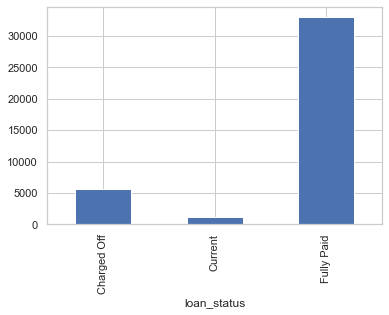

In [123]:
loanDf.groupby('loan_status').loan_amnt.count().plot.bar()

####Observation
Charged off loans are near to 5000

In [124]:
print("%.2f" % (loanDf.loc[loanDf['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loanDf)))

14.17


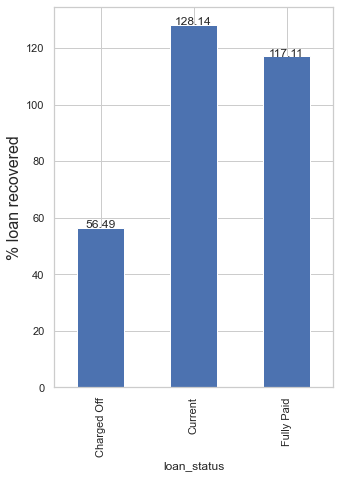

In [125]:
# Function to display values on sns bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#fig, ax = plt.subplots(1, 2)
           

plt.figure(figsize=(5,7))
ax = (loanDf.groupby('loan_status').total_pymnt.sum() * 100 / loanDf.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
show_values_on_bars(ax) 

### Observation
* Only 56.49% loans are recovered which are charged off
* 

In [126]:
loanDf.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

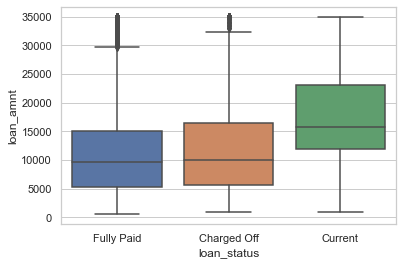

In [127]:

sns.boxplot(x=loanDf['loan_status'] , y=loanDf['loan_amnt'], data=loanDf)

#### Observation
* Charged off loans have median amount as 10000 which is same as fully paid

In [128]:
#Create Derived categorical variable
loanDf['loan_amnt_bin'] = pd.cut(loanDf['loan_amnt'], 
                                      [x for x in range(0, 40000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<AxesSubplot:xlabel='loan_amnt_bin'>

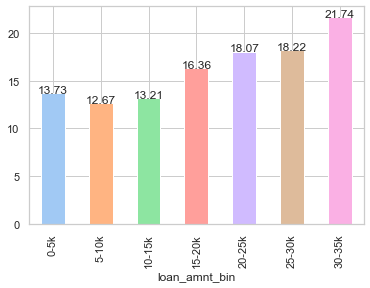

In [142]:
#Common function to perform comparison with charged off loans against other factors
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('pastel', 16))
    show_values_on_bars(ax)
    return ax

plotLoanStatus(loanDf, 'loan_amnt_bin')


<AxesSubplot:xlabel='purpose'>

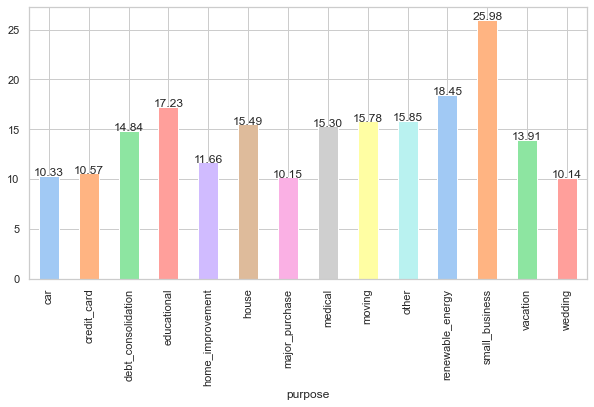

In [143]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'purpose')

#### Observation
* Amongst all charged off , 26% is from small business. Hence Giving loans to small business seems to be risky.

<AxesSubplot:xlabel='home_ownership'>

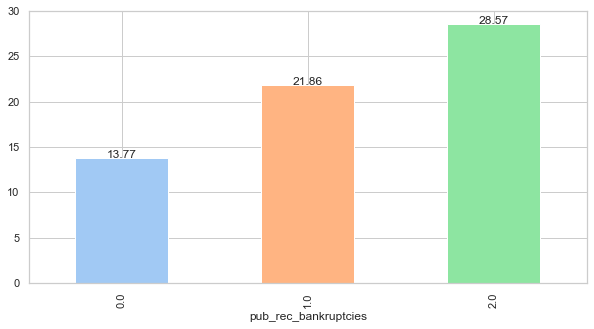

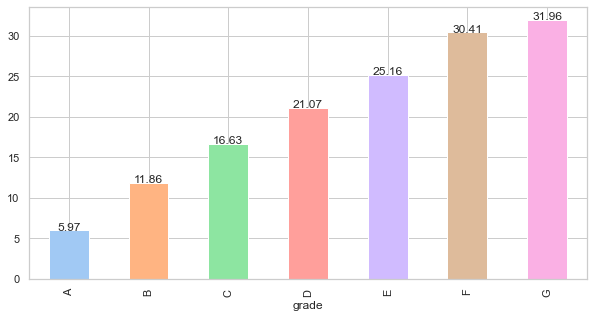

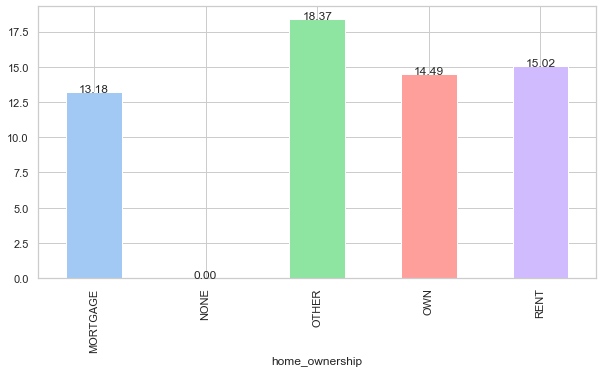

In [144]:

plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'pub_rec_bankruptcies')
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'grade')
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'home_ownership')

#### Observation
* Higher charged off behavior is seen among those loans which has higher public record for bankruptcy.
* Lower the grade of loans , higher has been their probability to default.
* People who owns their own home have lower proability to default.


<AxesSubplot:xlabel='interest_rate'>

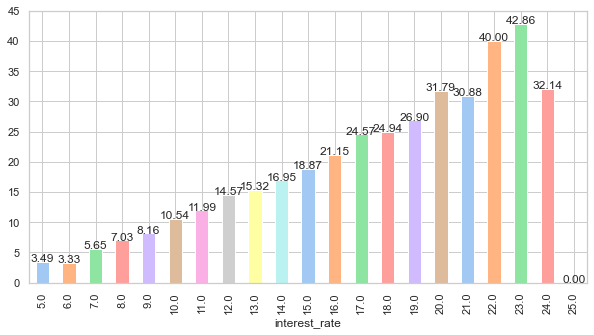

In [131]:
loanDf['interest_rate'] = round(loanDf['int_rate'])
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'interest_rate')

#### Observation
* Default rate is increases with increase in interest rate, but with one suprise it default decreases suddenly when interest reaches 24%

*** We need to analyse why default suddenly decreases when interest rate goes beyond 23%


<AxesSubplot:xlabel='grade'>

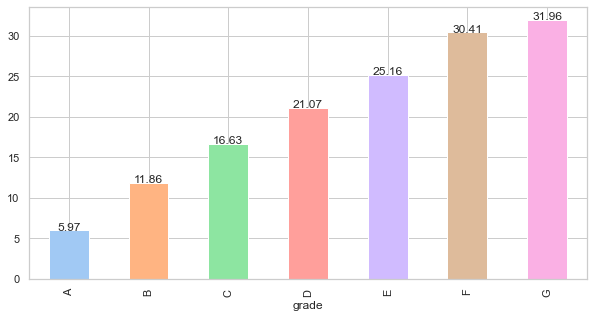

In [145]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'grade')

<AxesSubplot:title={'center':'int_rate'}, xlabel='grade'>

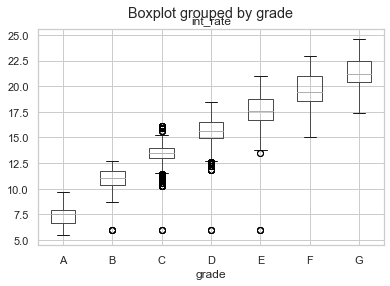

In [133]:

loanDf.boxplot(column=['int_rate'],by='grade')

#### Observation
* HIgher Interest rate has been associated with lower Grading of loans i.e.. Loans with lower probability has been given at high interest rate.

<AxesSubplot:xlabel='issue_d_year'>

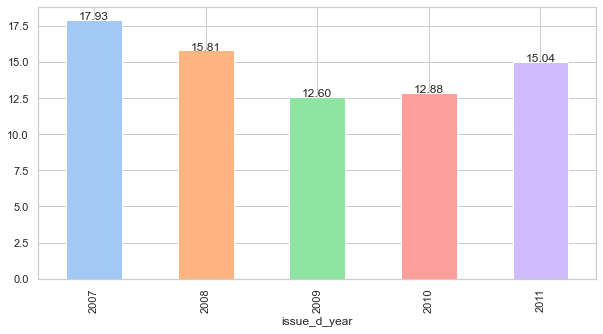

In [134]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'issue_d_year')

#### Observation
* Higher default was seen in the year 2007 and 2008 , which coincides with recession.
* Post 2008 , none of the year has seen same level of defaults which indicates that people were in really bad shape in 2007 and 2008 to pay loans compared to post 2008.

<AxesSubplot:xlabel='issue_d_month'>

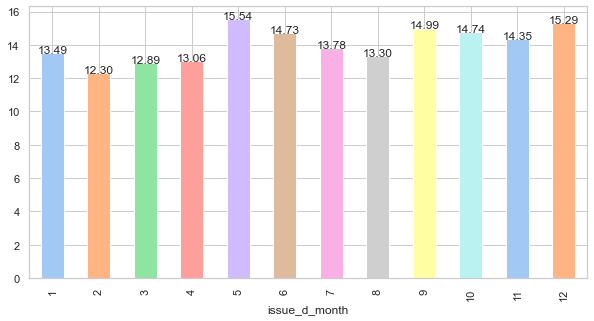

In [135]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'issue_d_month')

#### Observation
* There is no observed pattern wrt to months for default, hence it can be colcuded to be random.

<AxesSubplot:xlabel='addr_state'>

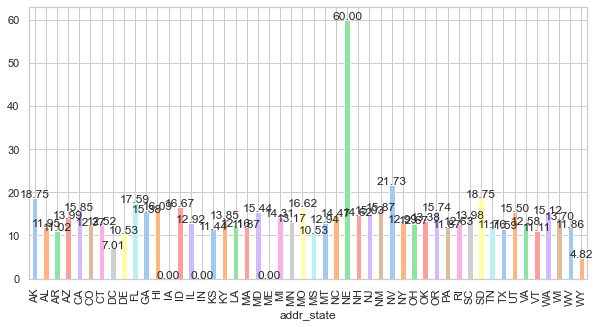

In [136]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loanDf, 'addr_state')

#### Observation
* State Nebraska has seen maximum contribution to defaults.

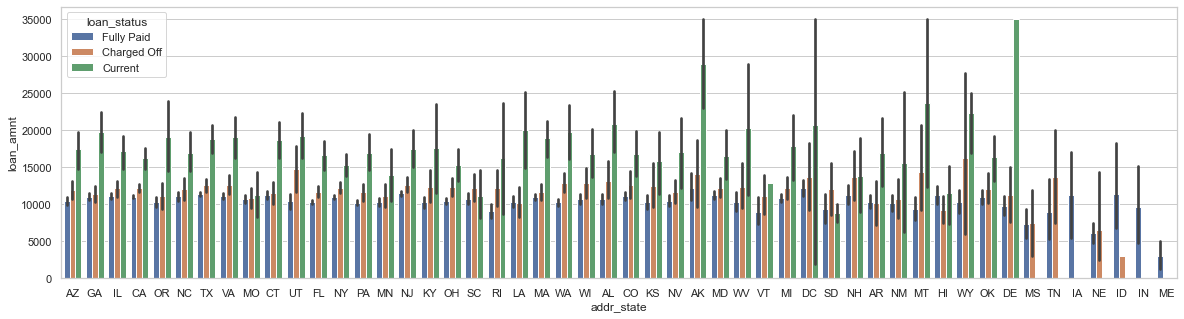

In [137]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loanDf, estimator=np.mean)
plt.show()

#### Observation
* In terms of amount, WASHINGTON contributed most to defaults.


* Lets check the impact of annual income wrt to loan taken

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


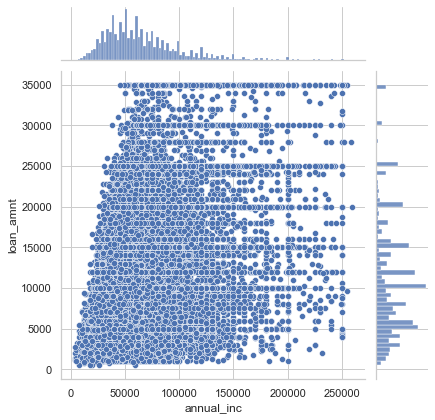

In [138]:
sns.jointplot('annual_inc', 'loan_amnt', loanDf.loc[loanDf['annual_inc']<260000])
plt.show()


<AxesSubplot:>

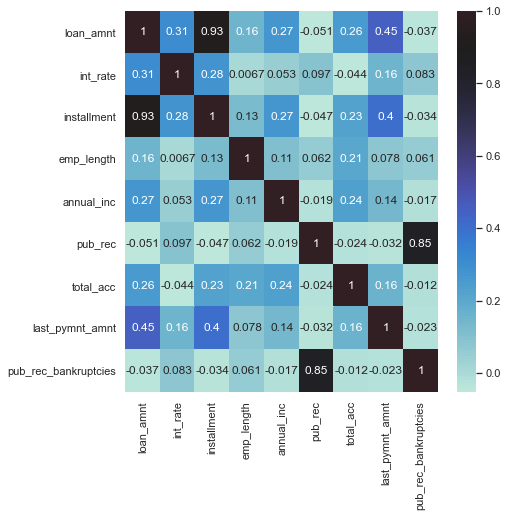

In [139]:
plt.figure(figsize=(7,7))
cor_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','pub_rec','total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies']
newDf = loanDf[cor_var].corr()
sns.heatmap(newDf, annot=True, center=0.9)

#### Observation
* Higher the loan amount , higher is the number of installment which makes sense.
* Higher the  derogatory public records, higher is the number of bankruptcies.